# Importing libraries and data

## Importing and installing uncommon libraries

In [12]:
#@title Installing uncommon libraries {display-mode: "form"}

!pip install gradio -q
!pip install tqdm -q


In [13]:
from tqdm.notebook import tqdm
import gradio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing datasets for genetic sequences

Dataset used for testing algorithms is COVID SEQUENCE - NC_045512  
Data is taken from https://www.ncbi.nlm.nih.gov/nuccore/NC_045512

In [14]:
#@title Getting COVID Sequence from NCBI {display-mode: "form"}

# This code will be hidden when the notebook is loaded.


genetic = """        1 attaaaggtt tataccttcc caggtaacaa accaaccaac tttcgatctc ttgtagatct
       61 gttctctaaa cgaactttaa aatctgtgtg gctgtcactc ggctgcatgc ttagtgcact
      121 cacgcagtat aattaataac taattactgt cgttgacagg acacgagtaa ctcgtctatc
      181 ttctgcaggc tgcttacggt ttcgtccgtg ttgcagccga tcatcagcac atctaggttt
      241 cgtccgggtg tgaccgaaag gtaagatgga gagccttgtc cctggtttca acgagaaaac
      301 acacgtccaa ctcagtttgc ctgttttaca ggttcgcgac gtgctcgtac gtggctttgg
      361 agactccgtg gaggaggtct tatcagaggc acgtcaacat cttaaagatg gcacttgtgg
      421 cttagtagaa gttgaaaaag gcgttttgcc tcaacttgaa cagccctatg tgttcatcaa
      481 acgttcggat gctcgaactg cacctcatgg tcatgttatg gttgagctgg tagcagaact
      541 cgaaggcatt cagtacggtc gtagtggtga gacacttggt gtccttgtcc ctcatgtggg
      601 cgaaatacca gtggcttacc gcaaggttct tcttcgtaag aacggtaata aaggagctgg
      661 tggccatagt tacggcgccg atctaaagtc atttgactta ggcgacgagc ttggcactga
      721 tccttatgaa gattttcaag aaaactggaa cactaaacat agcagtggtg ttacccgtga
      781 actcatgcgt gagcttaacg gaggggcata cactcgctat gtcgataaca acttctgtgg
      841 ccctgatggc taccctcttg agtgcattaa agaccttcta gcacgtgctg gtaaagcttc
      901 atgcactttg tccgaacaac tggactttat tgacactaag aggggtgtat actgctgccg
      961 tgaacatgag catgaaattg cttggtacac ggaacgttct gaaaagagct atgaattgca
     1021 gacacctttt gaaattaaat tggcaaagaa atttgacacc ttcaatgggg aatgtccaaa
     1081 ttttgtattt cccttaaatt ccataatcaa gactattcaa ccaagggttg aaaagaaaaa
     1141 gcttgatggc tttatgggta gaattcgatc tgtctatcca gttgcgtcac caaatgaatg
     1201 caaccaaatg tgcctttcaa ctctcatgaa gtgtgatcat tgtggtgaaa cttcatggca
     1261 gacgggcgat tttgttaaag ccacttgcga attttgtggc actgagaatt tgactaaaga
     1321 aggtgccact acttgtggtt acttacccca aaatgctgtt gttaaaattt attgtccagc
     1381 atgtcacaat tcagaagtag gacctgagca tagtcttgcc gaataccata atgaatctgg
     1441 cttgaaaacc attcttcgta agggtggtcg cactattgcc tttggaggct gtgtgttctc
     1501 ttatgttggt tgccataaca agtgtgccta ttgggttcca cgtgctagcg ctaacatagg
     1561 ttgtaaccat acaggtgttg ttggagaagg ttccgaaggt cttaatgaca accttcttga
     1621 aatactccaa aaagagaaag tcaacatcaa tattgttggt gactttaaac ttaatgaaga
     1681 gatcgccatt attttggcat ctttttctgc ttccacaagt gcttttgtgg aaactgtgaa
     1741 aggtttggat tataaagcat tcaaacaaat tgttgaatcc tgtggtaatt ttaaagttac
     1801 aaaaggaaaa gctaaaaaag gtgcctggaa tattggtgaa cagaaatcaa tactgagtcc
     1861 tctttatgca tttgcatcag aggctgctcg tgttgtacga tcaattttct cccgcactct
     1921 tgaaactgct caaaattctg tgcgtgtttt acagaaggcc gctataacaa tactagatgg
     1981 aatttcacag tattcactga gactcattga tgctatgatg ttcacatctg atttggctac
     2041 taacaatcta gttgtaatgg cctacattac aggtggtgtt gttcagttga cttcgcagtg
     2101 gctaactaac atctttggca ctgtttatga aaaactcaaa cccgtccttg attggcttga
     2161 agagaagttt aaggaaggtg tagagtttct tagagacggt tgggaaattg ttaaatttat
     2221 ctcaacctgt gcttgtgaaa ttgtcggtgg acaaattgtc acctgtgcaa aggaaattaa
     2281 ggagagtgtt cagacattct ttaagcttgt aaataaattt ttggctttgt gtgctgactc
     2341 tatcattatt ggtggagcta aacttaaagc cttgaattta ggtgaaacat ttgtcacgca
     2401 ctcaaaggga ttgtacagaa agtgtgttaa atccagagaa gaaactggcc tactcatgcc
     2461 tctaaaagcc ccaaaagaaa ttatcttctt agagggagaa acacttccca cagaagtgtt
     2521 aacagaggaa gttgtcttga aaactggtga tttacaacca ttagaacaac ctactagtga
     2581 agctgttgaa gctccattgg ttggtacacc agtttgtatt aacgggctta tgttgctcga
     2641 aatcaaagac acagaaaagt actgtgccct tgcacctaat atgatggtaa caaacaatac
     2701 cttcacactc aaaggcggtg caccaacaaa ggttactttt ggtgatgaca ctgtgataga
     2761 agtgcaaggt tacaagagtg tgaatatcac ttttgaactt gatgaaagga ttgataaagt
     2821 acttaatgag aagtgctctg cctatacagt tgaactcggt acagaagtaa atgagttcgc
     2881 ctgtgttgtg gcagatgctg tcataaaaac tttgcaacca gtatctgaat tacttacacc
     2941 actgggcatt gatttagatg agtggagtat ggctacatac tacttatttg atgagtctgg
     3001 tgagtttaaa ttggcttcac atatgtattg ttctttctac cctccagatg aggatgaaga
     3061 agaaggtgat tgtgaagaag aagagtttga gccatcaact caatatgagt atggtactga
     3121 agatgattac caaggtaaac ctttggaatt tggtgccact tctgctgctc ttcaacctga
     3181 agaagagcaa gaagaagatt ggttagatga tgatagtcaa caaactgttg gtcaacaaga
     3241 cggcagtgag gacaatcaga caactactat tcaaacaatt gttgaggttc aacctcaatt
     3301 agagatggaa cttacaccag ttgttcagac tattgaagtg aatagtttta gtggttattt
     3361 aaaacttact gacaatgtat acattaaaaa tgcagacatt gtggaagaag ctaaaaaggt
     3421 aaaaccaaca gtggttgtta atgcagccaa tgtttacctt aaacatggag gaggtgttgc
     3481 aggagcctta aataaggcta ctaacaatgc catgcaagtt gaatctgatg attacatagc
     3541 tactaatgga ccacttaaag tgggtggtag ttgtgtttta agcggacaca atcttgctaa
     3601 acactgtctt catgttgtcg gcccaaatgt taacaaaggt gaagacattc aacttcttaa
     3661 gagtgcttat gaaaatttta atcagcacga agttctactt gcaccattat tatcagctgg
     3721 tatttttggt gctgacccta tacattcttt aagagtttgt gtagatactg ttcgcacaaa
     3781 tgtctactta gctgtctttg ataaaaatct ctatgacaaa cttgtttcaa gctttttgga
     3841 aatgaagagt gaaaagcaag ttgaacaaaa gatcgctgag attcctaaag aggaagttaa
     3901 gccatttata actgaaagta aaccttcagt tgaacagaga aaacaagatg ataagaaaat
     3961 caaagcttgt gttgaagaag ttacaacaac tctggaagaa actaagttcc tcacagaaaa
     4021 cttgttactt tatattgaca ttaatggcaa tcttcatcca gattctgcca ctcttgttag
     4081 tgacattgac atcactttct taaagaaaga tgctccatat atagtgggtg atgttgttca
     4141 agagggtgtt ttaactgctg tggttatacc tactaaaaag gctggtggca ctactgaaat
     4201 gctagcgaaa gctttgagaa aagtgccaac agacaattat ataaccactt acccgggtca
     4261 gggtttaaat ggttacactg tagaggaggc aaagacagtg cttaaaaagt gtaaaagtgc
     4321 cttttacatt ctaccatcta ttatctctaa tgagaagcaa gaaattcttg gaactgtttc
     4381 ttggaatttg cgagaaatgc ttgcacatgc agaagaaaca cgcaaattaa tgcctgtctg
     4441 tgtggaaact aaagccatag tttcaactat acagcgtaaa tataagggta ttaaaataca
     4501 agagggtgtg gttgattatg gtgctagatt ttacttttac accagtaaaa caactgtagc
     4561 gtcacttatc aacacactta acgatctaaa tgaaactctt gttacaatgc cacttggcta
     4621 tgtaacacat ggcttaaatt tggaagaagc tgctcggtat atgagatctc tcaaagtgcc
     4681 agctacagtt tctgtttctt cacctgatgc tgttacagcg tataatggtt atcttacttc
     4741 ttcttctaaa acacctgaag aacattttat tgaaaccatc tcacttgctg gttcctataa
     4801 agattggtcc tattctggac aatctacaca actaggtata gaatttctta agagaggtga
     4861 taaaagtgta tattacacta gtaatcctac cacattccac ctagatggtg aagttatcac
     4921 ctttgacaat cttaagacac ttctttcttt gagagaagtg aggactatta aggtgtttac
     4981 aacagtagac aacattaacc tccacacgca agttgtggac atgtcaatga catatggaca
     5041 acagtttggt ccaacttatt tggatggagc tgatgttact aaaataaaac ctcataattc
     5101 acatgaaggt aaaacatttt atgttttacc taatgatgac actctacgtg ttgaggcttt
     5161 tgagtactac cacacaactg atcctagttt tctgggtagg tacatgtcag cattaaatca
     5221 cactaaaaag tggaaatacc cacaagttaa tggtttaact tctattaaat gggcagataa
     5281 caactgttat cttgccactg cattgttaac actccaacaa atagagttga agtttaatcc
     5341 acctgctcta caagatgctt attacagagc aagggctggt gaagctgcta acttttgtgc
     5401 acttatctta gcctactgta ataagacagt aggtgagtta ggtgatgtta gagaaacaat
     5461 gagttacttg tttcaacatg ccaatttaga ttcttgcaaa agagtcttga acgtggtgtg
     5521 taaaacttgt ggacaacagc agacaaccct taagggtgta gaagctgtta tgtacatggg
     5581 cacactttct tatgaacaat ttaagaaagg tgttcagata ccttgtacgt gtggtaaaca
     5641 agctacaaaa tatctagtac aacaggagtc accttttgtt atgatgtcag caccacctgc
     5701 tcagtatgaa cttaagcatg gtacatttac ttgtgctagt gagtacactg gtaattacca
     5761 gtgtggtcac tataaacata taacttctaa agaaactttg tattgcatag acggtgcttt
     5821 acttacaaag tcctcagaat acaaaggtcc tattacggat gttttctaca aagaaaacag
     5881 ttacacaaca accataaaac cagttactta taaattggat ggtgttgttt gtacagaaat
     5941 tgaccctaag ttggacaatt attataagaa agacaattct tatttcacag agcaaccaat
     6001 tgatcttgta ccaaaccaac catatccaaa cgcaagcttc gataatttta agtttgtatg
     6061 tgataatatc aaatttgctg atgatttaaa ccagttaact ggttataaga aacctgcttc
     6121 aagagagctt aaagttacat ttttccctga cttaaatggt gatgtggtgg ctattgatta
     6181 taaacactac acaccctctt ttaagaaagg agctaaattg ttacataaac ctattgtttg
     6241 gcatgttaac aatgcaacta ataaagccac gtataaacca aatacctggt gtatacgttg
     6301 tctttggagc acaaaaccag ttgaaacatc aaattcgttt gatgtactga agtcagagga
     6361 cgcgcaggga atggataatc ttgcctgcga agatctaaaa ccagtctctg aagaagtagt
     6421 ggaaaatcct accatacaga aagacgttct tgagtgtaat gtgaaaacta ccgaagttgt
     6481 aggagacatt atacttaaac cagcaaataa tagtttaaaa attacagaag aggttggcca
     6541 cacagatcta atggctgctt atgtagacaa ttctagtctt actattaaga aacctaatga
     6601 attatctaga gtattaggtt tgaaaaccct tgctactcat ggtttagctg ctgttaatag
     6661 tgtcccttgg gatactatag ctaattatgc taagcctttt cttaacaaag ttgttagtac
     6721 aactactaac atagttacac ggtgtttaaa ccgtgtttgt actaattata tgccttattt
     6781 ctttacttta ttgctacaat tgtgtacttt tactagaagt acaaattcta gaattaaagc
     6841 atctatgccg actactatag caaagaatac tgttaagagt gtcggtaaat tttgtctaga
     6901 ggcttcattt aattatttga agtcacctaa tttttctaaa ctgataaata ttataatttg
     6961 gtttttacta ttaagtgttt gcctaggttc tttaatctac tcaaccgctg ctttaggtgt
     7021 tttaatgtct aatttaggca tgccttctta ctgtactggt tacagagaag gctatttgaa
     7081 ctctactaat gtcactattg caacctactg tactggttct ataccttgta gtgtttgtct
     7141 tagtggttta gattctttag acacctatcc ttctttagaa actatacaaa ttaccatttc
     7201 atcttttaaa tgggatttaa ctgcttttgg cttagttgca gagtggtttt tggcatatat
     7261 tcttttcact aggtttttct atgtacttgg attggctgca atcatgcaat tgtttttcag
     7321 ctattttgca gtacatttta ttagtaattc ttggcttatg tggttaataa ttaatcttgt
     7381 acaaatggcc ccgatttcag ctatggttag aatgtacatc ttctttgcat cattttatta
     7441 tgtatggaaa agttatgtgc atgttgtaga cggttgtaat tcatcaactt gtatgatgtg
     7501 ttacaaacgt aatagagcaa caagagtcga atgtacaact attgttaatg gtgttagaag
     7561 gtccttttat gtctatgcta atggaggtaa aggcttttgc aaactacaca attggaattg
     7621 tgttaattgt gatacattct gtgctggtag tacatttatt agtgatgaag ttgcgagaga
     7681 cttgtcacta cagtttaaaa gaccaataaa tcctactgac cagtcttctt acatcgttga
     7741 tagtgttaca gtgaagaatg gttccatcca tctttacttt gataaagctg gtcaaaagac
     7801 ttatgaaaga cattctctct ctcattttgt taacttagac aacctgagag ctaataacac
     7861 taaaggttca ttgcctatta atgttatagt ttttgatggt aaatcaaaat gtgaagaatc
     7921 atctgcaaaa tcagcgtctg tttactacag tcagcttatg tgtcaaccta tactgttact
     7981 agatcaggca ttagtgtctg atgttggtga tagtgcggaa gttgcagtta aaatgtttga
     8041 tgcttacgtt aatacgtttt catcaacttt taacgtacca atggaaaaac tcaaaacact
     8101 agttgcaact gcagaagctg aacttgcaaa gaatgtgtcc ttagacaatg tcttatctac
     8161 ttttatttca gcagctcggc aagggtttgt tgattcagat gtagaaacta aagatgttgt
     8221 tgaatgtctt aaattgtcac atcaatctga catagaagtt actggcgata gttgtaataa
     8281 ctatatgctc acctataaca aagttgaaaa catgacaccc cgtgaccttg gtgcttgtat
     8341 tgactgtagt gcgcgtcata ttaatgcgca ggtagcaaaa agtcacaaca ttgctttgat
     8401 atggaacgtt aaagatttca tgtcattgtc tgaacaacta cgaaaacaaa tacgtagtgc
     8461 tgctaaaaag aataacttac cttttaagtt gacatgtgca actactagac aagttgttaa
     8521 tgttgtaaca acaaagatag cacttaaggg tggtaaaatt gttaataatt ggttgaagca
     8581 gttaattaaa gttacacttg tgttcctttt tgttgctgct attttctatt taataacacc
     8641 tgttcatgtc atgtctaaac atactgactt ttcaagtgaa atcataggat acaaggctat
     8701 tgatggtggt gtcactcgtg acatagcatc tacagatact tgttttgcta acaaacatgc
     8761 tgattttgac acatggttta gccagcgtgg tggtagttat actaatgaca aagcttgccc
     8821 attgattgct gcagtcataa caagagaagt gggttttgtc gtgcctggtt tgcctggcac
     8881 gatattacgc acaactaatg gtgacttttt gcatttctta cctagagttt ttagtgcagt
     8941 tggtaacatc tgttacacac catcaaaact tatagagtac actgactttg caacatcagc
     9001 ttgtgttttg gctgctgaat gtacaatttt taaagatgct tctggtaagc cagtaccata
     9061 ttgttatgat accaatgtac tagaaggttc tgttgcttat gaaagtttac gccctgacac
     9121 acgttatgtg ctcatggatg gctctattat tcaatttcct aacacctacc ttgaaggttc
     9181 tgttagagtg gtaacaactt ttgattctga gtactgtagg cacggcactt gtgaaagatc
     9241 agaagctggt gtttgtgtat ctactagtgg tagatgggta cttaacaatg attattacag
     9301 atctttacca ggagttttct gtggtgtaga tgctgtaaat ttacttacta atatgtttac
     9361 accactaatt caacctattg gtgctttgga catatcagca tctatagtag ctggtggtat
     9421 tgtagctatc gtagtaacat gccttgccta ctattttatg aggtttagaa gagcttttgg
     9481 tgaatacagt catgtagttg cctttaatac tttactattc cttatgtcat tcactgtact
     9541 ctgtttaaca ccagtttact cattcttacc tggtgtttat tctgttattt acttgtactt
     9601 gacattttat cttactaatg atgtttcttt tttagcacat attcagtgga tggttatgtt
     9661 cacaccttta gtacctttct ggataacaat tgcttatatc atttgtattt ccacaaagca
     9721 tttctattgg ttctttagta attacctaaa gagacgtgta gtctttaatg gtgtttcctt
     9781 tagtactttt gaagaagctg cgctgtgcac ctttttgtta aataaagaaa tgtatctaaa
     9841 gttgcgtagt gatgtgctat tacctcttac gcaatataat agatacttag ctctttataa
     9901 taagtacaag tattttagtg gagcaatgga tacaactagc tacagagaag ctgcttgttg
     9961 tcatctcgca aaggctctca atgacttcag taactcaggt tctgatgttc tttaccaacc
    10021 accacaaacc tctatcacct cagctgtttt gcagagtggt tttagaaaaa tggcattccc
    10081 atctggtaaa gttgagggtt gtatggtaca agtaacttgt ggtacaacta cacttaacgg
    10141 tctttggctt gatgacgtag tttactgtcc aagacatgtg atctgcacct ctgaagacat
    10201 gcttaaccct aattatgaag atttactcat tcgtaagtct aatcataatt tcttggtaca
    10261 ggctggtaat gttcaactca gggttattgg acattctatg caaaattgtg tacttaagct
    10321 taaggttgat acagccaatc ctaagacacc taagtataag tttgttcgca ttcaaccagg
    10381 acagactttt tcagtgttag cttgttacaa tggttcacca tctggtgttt accaatgtgc
    10441 tatgaggccc aatttcacta ttaagggttc attccttaat ggttcatgtg gtagtgttgg
    10501 ttttaacata gattatgact gtgtctcttt ttgttacatg caccatatgg aattaccaac
    10561 tggagttcat gctggcacag acttagaagg taacttttat ggaccttttg ttgacaggca
    10621 aacagcacaa gcagctggta cggacacaac tattacagtt aatgttttag cttggttgta
    10681 cgctgctgtt ataaatggag acaggtggtt tctcaatcga tttaccacaa ctcttaatga
    10741 ctttaacctt gtggctatga agtacaatta tgaacctcta acacaagacc atgttgacat
    10801 actaggacct ctttctgctc aaactggaat tgccgtttta gatatgtgtg cttcattaaa
    10861 agaattactg caaaatggta tgaatggacg taccatattg ggtagtgctt tattagaaga
    10921 tgaatttaca ccttttgatg ttgttagaca atgctcaggt gttactttcc aaagtgcagt
    10981 gaaaagaaca atcaagggta cacaccactg gttgttactc acaattttga cttcactttt
    11041 agttttagtc cagagtactc aatggtcttt gttctttttt ttgtatgaaa atgccttttt
    11101 accttttgct atgggtatta ttgctatgtc tgcttttgca atgatgtttg tcaaacataa
    11161 gcatgcattt ctctgtttgt ttttgttacc ttctcttgcc actgtagctt attttaatat
    11221 ggtctatatg cctgctagtt gggtgatgcg tattatgaca tggttggata tggttgatac
    11281 tagtttgtct ggttttaagc taaaagactg tgttatgtat gcatcagctg tagtgttact
    11341 aatccttatg acagcaagaa ctgtgtatga tgatggtgct aggagagtgt ggacacttat
    11401 gaatgtcttg acactcgttt ataaagttta ttatggtaat gctttagatc aagccatttc
    11461 catgtgggct cttataatct ctgttacttc taactactca ggtgtagtta caactgtcat
    11521 gtttttggcc agaggtattg tttttatgtg tgttgagtat tgccctattt tcttcataac
    11581 tggtaataca cttcagtgta taatgctagt ttattgtttc ttaggctatt tttgtacttg
    11641 ttactttggc ctcttttgtt tactcaaccg ctactttaga ctgactcttg gtgtttatga
    11701 ttacttagtt tctacacagg agtttagata tatgaattca cagggactac tcccacccaa
    11761 gaatagcata gatgccttca aactcaacat taaattgttg ggtgttggtg gcaaaccttg
    11821 tatcaaagta gccactgtac agtctaaaat gtcagatgta aagtgcacat cagtagtctt
    11881 actctcagtt ttgcaacaac tcagagtaga atcatcatct aaattgtggg ctcaatgtgt
    11941 ccagttacac aatgacattc tcttagctaa agatactact gaagcctttg aaaaaatggt
    12001 ttcactactt tctgttttgc tttccatgca gggtgctgta gacataaaca agctttgtga
    12061 agaaatgctg gacaacaggg caaccttaca agctatagcc tcagagttta gttcccttcc
    12121 atcatatgca gcttttgcta ctgctcaaga agcttatgag caggctgttg ctaatggtga
    12181 ttctgaagtt gttcttaaaa agttgaagaa gtctttgaat gtggctaaat ctgaatttga
    12241 ccgtgatgca gccatgcaac gtaagttgga aaagatggct gatcaagcta tgacccaaat
    12301 gtataaacag gctagatctg aggacaagag ggcaaaagtt actagtgcta tgcagacaat
    12361 gcttttcact atgcttagaa agttggataa tgatgcactc aacaacatta tcaacaatgc
    12421 aagagatggt tgtgttccct tgaacataat acctcttaca acagcagcca aactaatggt
    12481 tgtcatacca gactataaca catataaaaa tacgtgtgat ggtacaacat ttacttatgc
    12541 atcagcattg tgggaaatcc aacaggttgt agatgcagat agtaaaattg ttcaacttag
    12601 tgaaattagt atggacaatt cacctaattt agcatggcct cttattgtaa cagctttaag
    12661 ggccaattct gctgtcaaat tacagaataa tgagcttagt cctgttgcac tacgacagat
    12721 gtcttgtgct gccggtacta cacaaactgc ttgcactgat gacaatgcgt tagcttacta
    12781 caacacaaca aagggaggta ggtttgtact tgcactgtta tccgatttac aggatttgaa
    12841 atgggctaga ttccctaaga gtgatggaac tggtactatc tatacagaac tggaaccacc
    12901 ttgtaggttt gttacagaca cacctaaagg tcctaaagtg aagtatttat actttattaa
    12961 aggattaaac aacctaaata gaggtatggt acttggtagt ttagctgcca cagtacgtct
    13021 acaagctggt aatgcaacag aagtgcctgc caattcaact gtattatctt tctgtgcttt
    13081 tgctgtagat gctgctaaag cttacaaaga ttatctagct agtgggggac aaccaatcac
    13141 taattgtgtt aagatgttgt gtacacacac tggtactggt caggcaataa cagttacacc
    13201 ggaagccaat atggatcaag aatcctttgg tggtgcatcg tgttgtctgt actgccgttg
    13261 ccacatagat catccaaatc ctaaaggatt ttgtgactta aaaggtaagt atgtacaaat
    13321 acctacaact tgtgctaatg accctgtggg ttttacactt aaaaacacag tctgtaccgt
    13381 ctgcggtatg tggaaaggtt atggctgtag ttgtgatcaa ctccgcgaac ccatgcttca
    13441 gtcagctgat gcacaatcgt ttttaaacgg gtttgcggtg taagtgcagc ccgtcttaca
    13501 ccgtgcggca caggcactag tactgatgtc gtatacaggg cttttgacat ctacaatgat
    13561 aaagtagctg gttttgctaa attcctaaaa actaattgtt gtcgcttcca agaaaaggac
    13621 gaagatgaca atttaattga ttcttacttt gtagttaaga gacacacttt ctctaactac
    13681 caacatgaag aaacaattta taatttactt aaggattgtc cagctgttgc taaacatgac
    13741 ttctttaagt ttagaataga cggtgacatg gtaccacata tatcacgtca acgtcttact
    13801 aaatacacaa tggcagacct cgtctatgct ttaaggcatt ttgatgaagg taattgtgac
    13861 acattaaaag aaatacttgt cacatacaat tgttgtgatg atgattattt caataaaaag
    13921 gactggtatg attttgtaga aaacccagat atattacgcg tatacgccaa cttaggtgaa
    13981 cgtgtacgcc aagctttgtt aaaaacagta caattctgtg atgccatgcg aaatgctggt
    14041 attgttggtg tactgacatt agataatcaa gatctcaatg gtaactggta tgatttcggt
    14101 gatttcatac aaaccacgcc aggtagtgga gttcctgttg tagattctta ttattcattg
    14161 ttaatgccta tattaacctt gaccagggct ttaactgcag agtcacatgt tgacactgac
    14221 ttaacaaagc cttacattaa gtgggatttg ttaaaatatg acttcacgga agagaggtta
    14281 aaactctttg accgttattt taaatattgg gatcagacat accacccaaa ttgtgttaac
    14341 tgtttggatg acagatgcat tctgcattgt gcaaacttta atgttttatt ctctacagtg
    14401 ttcccaccta caagttttgg accactagtg agaaaaatat ttgttgatgg tgttccattt
    14461 gtagtttcaa ctggatacca cttcagagag ctaggtgttg tacataatca ggatgtaaac
    14521 ttacatagct ctagacttag ttttaaggaa ttacttgtgt atgctgctga ccctgctatg
    14581 cacgctgctt ctggtaatct attactagat aaacgcacta cgtgcttttc agtagctgca
    14641 cttactaaca atgttgcttt tcaaactgtc aaacccggta attttaacaa agacttctat
    14701 gactttgctg tgtctaaggg tttctttaag gaaggaagtt ctgttgaatt aaaacacttc
    14761 ttctttgctc aggatggtaa tgctgctatc agcgattatg actactatcg ttataatcta
    14821 ccaacaatgt gtgatatcag acaactacta tttgtagttg aagttgttga taagtacttt
    14881 gattgttacg atggtggctg tattaatgct aaccaagtca tcgtcaacaa cctagacaaa
    14941 tcagctggtt ttccatttaa taaatggggt aaggctagac tttattatga ttcaatgagt
    15001 tatgaggatc aagatgcact tttcgcatat acaaaacgta atgtcatccc tactataact
    15061 caaatgaatc ttaagtatgc cattagtgca aagaatagag ctcgcaccgt agctggtgtc
    15121 tctatctgta gtactatgac caatagacag tttcatcaaa aattattgaa atcaatagcc
    15181 gccactagag gagctactgt agtaattgga acaagcaaat tctatggtgg ttggcacaac
    15241 atgttaaaaa ctgtttatag tgatgtagaa aaccctcacc ttatgggttg ggattatcct
    15301 aaatgtgata gagccatgcc taacatgctt agaattatgg cctcacttgt tcttgctcgc
    15361 aaacatacaa cgtgttgtag cttgtcacac cgtttctata gattagctaa tgagtgtgct
    15421 caagtattga gtgaaatggt catgtgtggc ggttcactat atgttaaacc aggtggaacc
    15481 tcatcaggag atgccacaac tgcttatgct aatagtgttt ttaacatttg tcaagctgtc
    15541 acggccaatg ttaatgcact tttatctact gatggtaaca aaattgccga taagtatgtc
    15601 cgcaatttac aacacagact ttatgagtgt ctctatagaa atagagatgt tgacacagac
    15661 tttgtgaatg agttttacgc atatttgcgt aaacatttct caatgatgat actctctgac
    15721 gatgctgttg tgtgtttcaa tagcacttat gcatctcaag gtctagtggc tagcataaag
    15781 aactttaagt cagttcttta ttatcaaaac aatgttttta tgtctgaagc aaaatgttgg
    15841 actgagactg accttactaa aggacctcat gaattttgct ctcaacatac aatgctagtt
    15901 aaacagggtg atgattatgt gtaccttcct tacccagatc catcaagaat cctaggggcc
    15961 ggctgttttg tagatgatat cgtaaaaaca gatggtacac ttatgattga acggttcgtg
    16021 tctttagcta tagatgctta cccacttact aaacatccta atcaggagta tgctgatgtc
    16081 tttcatttgt acttacaata cataagaaag ctacatgatg agttaacagg acacatgtta
    16141 gacatgtatt ctgttatgct tactaatgat aacacttcaa ggtattggga acctgagttt
    16201 tatgaggcta tgtacacacc gcatacagtc ttacaggctg ttggggcttg tgttctttgc
    16261 aattcacaga cttcattaag atgtggtgct tgcatacgta gaccattctt atgttgtaaa
    16321 tgctgttacg accatgtcat atcaacatca cataaattag tcttgtctgt taatccgtat
    16381 gtttgcaatg ctccaggttg tgatgtcaca gatgtgactc aactttactt aggaggtatg
    16441 agctattatt gtaaatcaca taaaccaccc attagttttc cattgtgtgc taatggacaa
    16501 gtttttggtt tatataaaaa tacatgtgtt ggtagcgata atgttactga ctttaatgca
    16561 attgcaacat gtgactggac aaatgctggt gattacattt tagctaacac ctgtactgaa
    16621 agactcaagc tttttgcagc agaaacgctc aaagctactg aggagacatt taaactgtct
    16681 tatggtattg ctactgtacg tgaagtgctg tctgacagag aattacatct ttcatgggaa
    16741 gttggtaaac ctagaccacc acttaaccga aattatgtct ttactggtta tcgtgtaact
    16801 aaaaacagta aagtacaaat aggagagtac acctttgaaa aaggtgacta tggtgatgct
    16861 gttgtttacc gaggtacaac aacttacaaa ttaaatgttg gtgattattt tgtgctgaca
    16921 tcacatacag taatgccatt aagtgcacct acactagtgc cacaagagca ctatgttaga
    16981 attactggct tatacccaac actcaatatc tcagatgagt tttctagcaa tgttgcaaat
    17041 tatcaaaagg ttggtatgca aaagtattct acactccagg gaccacctgg tactggtaag
    17101 agtcattttg ctattggcct agctctctac tacccttctg ctcgcatagt gtatacagct
    17161 tgctctcatg ccgctgttga tgcactatgt gagaaggcat taaaatattt gcctatagat
    17221 aaatgtagta gaattatacc tgcacgtgct cgtgtagagt gttttgataa attcaaagtg
    17281 aattcaacat tagaacagta tgtcttttgt actgtaaatg cattgcctga gacgacagca
    17341 gatatagttg tctttgatga aatttcaatg gccacaaatt atgatttgag tgttgtcaat
    17401 gccagattac gtgctaagca ctatgtgtac attggcgacc ctgctcaatt acctgcacca
    17461 cgcacattgc taactaaggg cacactagaa ccagaatatt tcaattcagt gtgtagactt
    17521 atgaaaacta taggtccaga catgttcctc ggaacttgtc ggcgttgtcc tgctgaaatt
    17581 gttgacactg tgagtgcttt ggtttatgat aataagctta aagcacataa agacaaatca
    17641 gctcaatgct ttaaaatgtt ttataagggt gttatcacgc atgatgtttc atctgcaatt
    17701 aacaggccac aaataggcgt ggtaagagaa ttccttacac gtaaccctgc ttggagaaaa
    17761 gctgtcttta tttcacctta taattcacag aatgctgtag cctcaaagat tttgggacta
    17821 ccaactcaaa ctgttgattc atcacagggc tcagaatatg actatgtcat attcactcaa
    17881 accactgaaa cagctcactc ttgtaatgta aacagattta atgttgctat taccagagca
    17941 aaagtaggca tactttgcat aatgtctgat agagaccttt atgacaagtt gcaatttaca
    18001 agtcttgaaa ttccacgtag gaatgtggca actttacaag ctgaaaatgt aacaggactc
    18061 tttaaagatt gtagtaaggt aatcactggg ttacatccta cacaggcacc tacacacctc
    18121 agtgttgaca ctaaattcaa aactgaaggt ttatgtgttg acatacctgg catacctaag
    18181 gacatgacct atagaagact catctctatg atgggtttta aaatgaatta tcaagttaat
    18241 ggttacccta acatgtttat cacccgcgaa gaagctataa gacatgtacg tgcatggatt
    18301 ggcttcgatg tcgaggggtg tcatgctact agagaagctg ttggtaccaa tttaccttta
    18361 cagctaggtt tttctacagg tgttaaccta gttgctgtac ctacaggtta tgttgataca
    18421 cctaataata cagatttttc cagagttagt gctaaaccac cgcctggaga tcaatttaaa
    18481 cacctcatac cacttatgta caaaggactt ccttggaatg tagtgcgtat aaagattgta
    18541 caaatgttaa gtgacacact taaaaatctc tctgacagag tcgtatttgt cttatgggca
    18601 catggctttg agttgacatc tatgaagtat tttgtgaaaa taggacctga gcgcacctgt
    18661 tgtctatgtg atagacgtgc cacatgcttt tccactgctt cagacactta tgcctgttgg
    18721 catcattcta ttggatttga ttacgtctat aatccgttta tgattgatgt tcaacaatgg
    18781 ggttttacag gtaacctaca aagcaaccat gatctgtatt gtcaagtcca tggtaatgca
    18841 catgtagcta gttgtgatgc aatcatgact aggtgtctag ctgtccacga gtgctttgtt
    18901 aagcgtgttg actggactat tgaatatcct ataattggtg atgaactgaa gattaatgcg
    18961 gcttgtagaa aggttcaaca catggttgtt aaagctgcat tattagcaga caaattccca
    19021 gttcttcacg acattggtaa ccctaaagct attaagtgtg tacctcaagc tgatgtagaa
    19081 tggaagttct atgatgcaca gccttgtagt gacaaagctt ataaaataga agaattattc
    19141 tattcttatg ccacacattc tgacaaattc acagatggtg tatgcctatt ttggaattgc
    19201 aatgtcgata gatatcctgc taattccatt gtttgtagat ttgacactag agtgctatct
    19261 aaccttaact tgcctggttg tgatggtggc agtttgtatg taaataaaca tgcattccac
    19321 acaccagctt ttgataaaag tgcttttgtt aatttaaaac aattaccatt tttctattac
    19381 tctgacagtc catgtgagtc tcatggaaaa caagtagtgt cagatataga ttatgtacca
    19441 ctaaagtctg ctacgtgtat aacacgttgc aatttaggtg gtgctgtctg tagacatcat
    19501 gctaatgagt acagattgta tctcgatgct tataacatga tgatctcagc tggctttagc
    19561 ttgtgggttt acaaacaatt tgatacttat aacctctgga acacttttac aagacttcag
    19621 agtttagaaa atgtggcttt taatgttgta aataagggac actttgatgg acaacagggt
    19681 gaagtaccag tttctatcat taataacact gtttacacaa aagttgatgg tgttgatgta
    19741 gaattgtttg aaaataaaac aacattacct gttaatgtag catttgagct ttgggctaag
    19801 cgcaacatta aaccagtacc agaggtgaaa atactcaata atttgggtgt ggacattgct
    19861 gctaatactg tgatctggga ctacaaaaga gatgctccag cacatatatc tactattggt
    19921 gtttgttcta tgactgacat agccaagaaa ccaactgaaa cgatttgtgc accactcact
    19981 gtcttttttg atggtagagt tgatggtcaa gtagacttat ttagaaatgc ccgtaatggt
    20041 gttcttatta cagaaggtag tgttaaaggt ttacaaccat ctgtaggtcc caaacaagct
    20101 agtcttaatg gagtcacatt aattggagaa gccgtaaaaa cacagttcaa ttattataag
    20161 aaagttgatg gtgttgtcca acaattacct gaaacttact ttactcagag tagaaattta
    20221 caagaattta aacccaggag tcaaatggaa attgatttct tagaattagc tatggatgaa
    20281 ttcattgaac ggtataaatt agaaggctat gccttcgaac atatcgttta tggagatttt
    20341 agtcatagtc agttaggtgg tttacatcta ctgattggac tagctaaacg ttttaaggaa
    20401 tcaccttttg aattagaaga ttttattcct atggacagta cagttaaaaa ctatttcata
    20461 acagatgcgc aaacaggttc atctaagtgt gtgtgttctg ttattgattt attacttgat
    20521 gattttgttg aaataataaa atcccaagat ttatctgtag tttctaaggt tgtcaaagtg
    20581 actattgact atacagaaat ttcatttatg ctttggtgta aagatggcca tgtagaaaca
    20641 ttttacccaa aattacaatc tagtcaagcg tggcaaccgg gtgttgctat gcctaatctt
    20701 tacaaaatgc aaagaatgct attagaaaag tgtgaccttc aaaattatgg tgatagtgca
    20761 acattaccta aaggcataat gatgaatgtc gcaaaatata ctcaactgtg tcaatattta
    20821 aacacattaa cattagctgt accctataat atgagagtta tacattttgg tgctggttct
    20881 gataaaggag ttgcaccagg tacagctgtt ttaagacagt ggttgcctac gggtacgctg
    20941 cttgtcgatt cagatcttaa tgactttgtc tctgatgcag attcaacttt gattggtgat
    21001 tgtgcaactg tacatacagc taataaatgg gatctcatta ttagtgatat gtacgaccct
    21061 aagactaaaa atgttacaaa agaaaatgac tctaaagagg gttttttcac ttacatttgt
    21121 gggtttatac aacaaaagct agctcttgga ggttccgtgg ctataaagat aacagaacat
    21181 tcttggaatg ctgatcttta taagctcatg ggacacttcg catggtggac agcctttgtt
    21241 actaatgtga atgcgtcatc atctgaagca tttttaattg gatgtaatta tcttggcaaa
    21301 ccacgcgaac aaatagatgg ttatgtcatg catgcaaatt acatattttg gaggaataca
    21361 aatccaattc agttgtcttc ctattcttta tttgacatga gtaaatttcc ccttaaatta
    21421 aggggtactg ctgttatgtc tttaaaagaa ggtcaaatca atgatatgat tttatctctt
    21481 cttagtaaag gtagacttat aattagagaa aacaacagag ttgttatttc tagtgatgtt
    21541 cttgttaaca actaaacgaa caatgtttgt ttttcttgtt ttattgccac tagtctctag
    21601 tcagtgtgtt aatcttacaa ccagaactca attaccccct gcatacacta attctttcac
    21661 acgtggtgtt tattaccctg acaaagtttt cagatcctca gttttacatt caactcagga
    21721 cttgttctta cctttctttt ccaatgttac ttggttccat gctatacatg tctctgggac
    21781 caatggtact aagaggtttg ataaccctgt cctaccattt aatgatggtg tttattttgc
    21841 ttccactgag aagtctaaca taataagagg ctggattttt ggtactactt tagattcgaa
    21901 gacccagtcc ctacttattg ttaataacgc tactaatgtt gttattaaag tctgtgaatt
    21961 tcaattttgt aatgatccat ttttgggtgt ttattaccac aaaaacaaca aaagttggat
    22021 ggaaagtgag ttcagagttt attctagtgc gaataattgc acttttgaat atgtctctca
    22081 gccttttctt atggaccttg aaggaaaaca gggtaatttc aaaaatctta gggaatttgt
    22141 gtttaagaat attgatggtt attttaaaat atattctaag cacacgccta ttaatttagt
    22201 gcgtgatctc cctcagggtt tttcggcttt agaaccattg gtagatttgc caataggtat
    22261 taacatcact aggtttcaaa ctttacttgc tttacataga agttatttga ctcctggtga
    22321 ttcttcttca ggttggacag ctggtgctgc agcttattat gtgggttatc ttcaacctag
    22381 gacttttcta ttaaaatata atgaaaatgg aaccattaca gatgctgtag actgtgcact
    22441 tgaccctctc tcagaaacaa agtgtacgtt gaaatccttc actgtagaaa aaggaatcta
    22501 tcaaacttct aactttagag tccaaccaac agaatctatt gttagatttc ctaatattac
    22561 aaacttgtgc ccttttggtg aagtttttaa cgccaccaga tttgcatctg tttatgcttg
    22621 gaacaggaag agaatcagca actgtgttgc tgattattct gtcctatata attccgcatc
    22681 attttccact tttaagtgtt atggagtgtc tcctactaaa ttaaatgatc tctgctttac
    22741 taatgtctat gcagattcat ttgtaattag aggtgatgaa gtcagacaaa tcgctccagg
    22801 gcaaactgga aagattgctg attataatta taaattacca gatgatttta caggctgcgt
    22861 tatagcttgg aattctaaca atcttgattc taaggttggt ggtaattata attacctgta
    22921 tagattgttt aggaagtcta atctcaaacc ttttgagaga gatatttcaa ctgaaatcta
    22981 tcaggccggt agcacacctt gtaatggtgt tgaaggtttt aattgttact ttcctttaca
    23041 atcatatggt ttccaaccca ctaatggtgt tggttaccaa ccatacagag tagtagtact
    23101 ttcttttgaa cttctacatg caccagcaac tgtttgtgga cctaaaaagt ctactaattt
    23161 ggttaaaaac aaatgtgtca atttcaactt caatggttta acaggcacag gtgttcttac
    23221 tgagtctaac aaaaagtttc tgcctttcca acaatttggc agagacattg ctgacactac
    23281 tgatgctgtc cgtgatccac agacacttga gattcttgac attacaccat gttcttttgg
    23341 tggtgtcagt gttataacac caggaacaaa tacttctaac caggttgctg ttctttatca
    23401 ggatgttaac tgcacagaag tccctgttgc tattcatgca gatcaactta ctcctacttg
    23461 gcgtgtttat tctacaggtt ctaatgtttt tcaaacacgt gcaggctgtt taataggggc
    23521 tgaacatgtc aacaactcat atgagtgtga catacccatt ggtgcaggta tatgcgctag
    23581 ttatcagact cagactaatt ctcctcggcg ggcacgtagt gtagctagtc aatccatcat
    23641 tgcctacact atgtcacttg gtgcagaaaa ttcagttgct tactctaata actctattgc
    23701 catacccaca aattttacta ttagtgttac cacagaaatt ctaccagtgt ctatgaccaa
    23761 gacatcagta gattgtacaa tgtacatttg tggtgattca actgaatgca gcaatctttt
    23821 gttgcaatat ggcagttttt gtacacaatt aaaccgtgct ttaactggaa tagctgttga
    23881 acaagacaaa aacacccaag aagtttttgc acaagtcaaa caaatttaca aaacaccacc
    23941 aattaaagat tttggtggtt ttaatttttc acaaatatta ccagatccat caaaaccaag
    24001 caagaggtca tttattgaag atctactttt caacaaagtg acacttgcag atgctggctt
    24061 catcaaacaa tatggtgatt gccttggtga tattgctgct agagacctca tttgtgcaca
    24121 aaagtttaac ggccttactg ttttgccacc tttgctcaca gatgaaatga ttgctcaata
    24181 cacttctgca ctgttagcgg gtacaatcac ttctggttgg acctttggtg caggtgctgc
    24241 attacaaata ccatttgcta tgcaaatggc ttataggttt aatggtattg gagttacaca
    24301 gaatgttctc tatgagaacc aaaaattgat tgccaaccaa tttaatagtg ctattggcaa
    24361 aattcaagac tcactttctt ccacagcaag tgcacttgga aaacttcaag atgtggtcaa
    24421 ccaaaatgca caagctttaa acacgcttgt taaacaactt agctccaatt ttggtgcaat
    24481 ttcaagtgtt ttaaatgata tcctttcacg tcttgacaaa gttgaggctg aagtgcaaat
    24541 tgataggttg atcacaggca gacttcaaag tttgcagaca tatgtgactc aacaattaat
    24601 tagagctgca gaaatcagag cttctgctaa tcttgctgct actaaaatgt cagagtgtgt
    24661 acttggacaa tcaaaaagag ttgatttttg tggaaagggc tatcatctta tgtccttccc
    24721 tcagtcagca cctcatggtg tagtcttctt gcatgtgact tatgtccctg cacaagaaaa
    24781 gaacttcaca actgctcctg ccatttgtca tgatggaaaa gcacactttc ctcgtgaagg
    24841 tgtctttgtt tcaaatggca cacactggtt tgtaacacaa aggaattttt atgaaccaca
    24901 aatcattact acagacaaca catttgtgtc tggtaactgt gatgttgtaa taggaattgt
    24961 caacaacaca gtttatgatc ctttgcaacc tgaattagac tcattcaagg aggagttaga
    25021 taaatatttt aagaatcata catcaccaga tgttgattta ggtgacatct ctggcattaa
    25081 tgcttcagtt gtaaacattc aaaaagaaat tgaccgcctc aatgaggttg ccaagaattt
    25141 aaatgaatct ctcatcgatc tccaagaact tggaaagtat gagcagtata taaaatggcc
    25201 atggtacatt tggctaggtt ttatagctgg cttgattgcc atagtaatgg tgacaattat
    25261 gctttgctgt atgaccagtt gctgtagttg tctcaagggc tgttgttctt gtggatcctg
    25321 ctgcaaattt gatgaagacg actctgagcc agtgctcaaa ggagtcaaat tacattacac
    25381 ataaacgaac ttatggattt gtttatgaga atcttcacaa ttggaactgt aactttgaag
    25441 caaggtgaaa tcaaggatgc tactccttca gattttgttc gcgctactgc aacgataccg
    25501 atacaagcct cactcccttt cggatggctt attgttggcg ttgcacttct tgctgttttt
    25561 cagagcgctt ccaaaatcat aaccctcaaa aagagatggc aactagcact ctccaagggt
    25621 gttcactttg tttgcaactt gctgttgttg tttgtaacag tttactcaca ccttttgctc
    25681 gttgctgctg gccttgaagc cccttttctc tatctttatg ctttagtcta cttcttgcag
    25741 agtataaact ttgtaagaat aataatgagg ctttggcttt gctggaaatg ccgttccaaa
    25801 aacccattac tttatgatgc caactatttt ctttgctggc atactaattg ttacgactat
    25861 tgtatacctt acaatagtgt aacttcttca attgtcatta cttcaggtga tggcacaaca
    25921 agtcctattt ctgaacatga ctaccagatt ggtggttata ctgaaaaatg ggaatctgga
    25981 gtaaaagact gtgttgtatt acacagttac ttcacttcag actattacca gctgtactca
    26041 actcaattga gtacagacac tggtgttgaa catgttacct tcttcatcta caataaaatt
    26101 gttgatgagc ctgaagaaca tgtccaaatt cacacaatcg acggttcatc cggagttgtt
    26161 aatccagtaa tggaaccaat ttatgatgaa ccgacgacga ctactagcgt gcctttgtaa
    26221 gcacaagctg atgagtacga acttatgtac tcattcgttt cggaagagac aggtacgtta
    26281 atagttaata gcgtacttct ttttcttgct ttcgtggtat tcttgctagt tacactagcc
    26341 atccttactg cgcttcgatt gtgtgcgtac tgctgcaata ttgttaacgt gagtcttgta
    26401 aaaccttctt tttacgttta ctctcgtgtt aaaaatctga attcttctag agttcctgat
    26461 cttctggtct aaacgaacta aatattatat tagtttttct gtttggaact ttaattttag
    26521 ccatggcaga ttccaacggt actattaccg ttgaagagct taaaaagctc cttgaacaat
    26581 ggaacctagt aataggtttc ctattcctta catggatttg tcttctacaa tttgcctatg
    26641 ccaacaggaa taggtttttg tatataatta agttaatttt cctctggctg ttatggccag
    26701 taactttagc ttgttttgtg cttgctgctg tttacagaat aaattggatc accggtggaa
    26761 ttgctatcgc aatggcttgt cttgtaggct tgatgtggct cagctacttc attgcttctt
    26821 tcagactgtt tgcgcgtacg cgttccatgt ggtcattcaa tccagaaact aacattcttc
    26881 tcaacgtgcc actccatggc actattctga ccagaccgct tctagaaagt gaactcgtaa
    26941 tcggagctgt gatccttcgt ggacatcttc gtattgctgg acaccatcta ggacgctgtg
    27001 acatcaagga cctgcctaaa gaaatcactg ttgctacatc acgaacgctt tcttattaca
    27061 aattgggagc ttcgcagcgt gtagcaggtg actcaggttt tgctgcatac agtcgctaca
    27121 ggattggcaa ctataaatta aacacagacc attccagtag cagtgacaat attgctttgc
    27181 ttgtacagta agtgacaaca gatgtttcat ctcgttgact ttcaggttac tatagcagag
    27241 atattactaa ttattatgag gacttttaaa gtttccattt ggaatcttga ttacatcata
    27301 aacctcataa ttaaaaattt atctaagtca ctaactgaga ataaatattc tcaattagat
    27361 gaagagcaac caatggagat tgattaaacg aacatgaaaa ttattctttt cttggcactg
    27421 ataacactcg ctacttgtga gctttatcac taccaagagt gtgttagagg tacaacagta
    27481 cttttaaaag aaccttgctc ttctggaaca tacgagggca attcaccatt tcatcctcta
    27541 gctgataaca aatttgcact gacttgcttt agcactcaat ttgcttttgc ttgtcctgac
    27601 ggcgtaaaac acgtctatca gttacgtgcc agatcagttt cacctaaact gttcatcaga
    27661 caagaggaag ttcaagaact ttactctcca atttttctta ttgttgcggc aatagtgttt
    27721 ataacacttt gcttcacact caaaagaaag acagaatgat tgaactttca ttaattgact
    27781 tctatttgtg ctttttagcc tttctgctat tccttgtttt aattatgctt attatctttt
    27841 ggttctcact tgaactgcaa gatcataatg aaacttgtca cgcctaaacg aacatgaaat
    27901 ttcttgtttt cttaggaatc atcacaactg tagctgcatt tcaccaagaa tgtagtttac
    27961 agtcatgtac tcaacatcaa ccatatgtag ttgatgaccc gtgtcctatt cacttctatt
    28021 ctaaatggta tattagagta ggagctagaa aatcagcacc tttaattgaa ttgtgcgtgg
    28081 atgaggctgg ttctaaatca cccattcagt acatcgatat cggtaattat acagtttcct
    28141 gtttaccttt tacaattaat tgccaggaac ctaaattggg tagtcttgta gtgcgttgtt
    28201 cgttctatga agacttttta gagtatcatg acgttcgtgt tgttttagat ttcatctaaa
    28261 cgaacaaact aaaatgtctg ataatggacc ccaaaatcag cgaaatgcac cccgcattac
    28321 gtttggtgga ccctcagatt caactggcag taaccagaat ggagaacgca gtggggcgcg
    28381 atcaaaacaa cgtcggcccc aaggtttacc caataatact gcgtcttggt tcaccgctct
    28441 cactcaacat ggcaaggaag accttaaatt ccctcgagga caaggcgttc caattaacac
    28501 caatagcagt ccagatgacc aaattggcta ctaccgaaga gctaccagac gaattcgtgg
    28561 tggtgacggt aaaatgaaag atctcagtcc aagatggtat ttctactacc taggaactgg
    28621 gccagaagct ggacttccct atggtgctaa caaagacggc atcatatggg ttgcaactga
    28681 gggagccttg aatacaccaa aagatcacat tggcacccgc aatcctgcta acaatgctgc
    28741 aatcgtgcta caacttcctc aaggaacaac attgccaaaa ggcttctacg cagaagggag
    28801 cagaggcggc agtcaagcct cttctcgttc ctcatcacgt agtcgcaaca gttcaagaaa
    28861 ttcaactcca ggcagcagta ggggaacttc tcctgctaga atggctggca atggcggtga
    28921 tgctgctctt gctttgctgc tgcttgacag attgaaccag cttgagagca aaatgtctgg
    28981 taaaggccaa caacaacaag gccaaactgt cactaagaaa tctgctgctg aggcttctaa
    29041 gaagcctcgg caaaaacgta ctgccactaa agcatacaat gtaacacaag ctttcggcag
    29101 acgtggtcca gaacaaaccc aaggaaattt tggggaccag gaactaatca gacaaggaac
    29161 tgattacaaa cattggccgc aaattgcaca atttgccccc agcgcttcag cgttcttcgg
    29221 aatgtcgcgc attggcatgg aagtcacacc ttcgggaacg tggttgacct acacaggtgc
    29281 catcaaattg gatgacaaag atccaaattt caaagatcaa gtcattttgc tgaataagca
    29341 tattgacgca tacaaaacat tcccaccaac agagcctaaa aaggacaaaa agaagaaggc
    29401 tgatgaaact caagccttac cgcagagaca gaagaaacag caaactgtga ctcttcttcc
    29461 tgctgcagat ttggatgatt tctccaaaca attgcaacaa tccatgagca gtgctgactc
    29521 aactcaggcc taaactcatg cagaccacac aaggcagatg ggctatataa acgttttcgc
    29581 ttttccgttt acgatatata gtctactctt gtgcagaatg aattctcgta actacatagc
    29641 acaagtagat gtagttaact ttaatctcac atagcaatct ttaatcagtg tgtaacatta
    29701 gggaggactt gaaagagcca ccacattttc accgaggcca cgcggagtac gatcgagtgt
    29761 acagtgaaca atgctaggga gagctgccta tatggaagag ccctaatgtg taaaattaat
    29821 tttagtagtg ctatccccat gtgattttaa tagcttctta ggagaatgac aaaaaaaaaa
    29881 aaaaaaaaaa aaaaaaaaaa aaa"""


gene = [x for x in genetic.split(" ") if not x.isdigit()]

GENETIC_SEQ = "".join([x.strip() for x in gene if x.strip() != ""]).upper()

In [15]:
TEST_SEQ = "CCCATTTA"

In [16]:
GENETIC_SEQ

'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTC

# Implementation of algorithms

1. Brute Force Search
2. Knuth-Morris-Pratt Search
3. Boyer-Moore Search

### Brute Force Algorithm

In [17]:
#@title Verbose Python method to find multiple substrings (Double loop method)

def brute_force_version(substring,original):
    list_of_idx = []
    for i in range(len(original)-len(substring)+1):
        failed_match = False
        for j in range(len(substring)):
            if original[i+j] != substring[j]:
                failed_match = True
                break
        if not failed_match:
            list_of_idx.append(i)
    return list_of_idx


### KMP Search Algorithm

In [18]:
#@title KMP Search Method to find multiple substrings

def KMP_version(substring,original):
    list_of_idx = []

    # create lps[] that will hold the longest prefix suffix for the entire 
    # pattern 
    lps = [0]*len(substring) 
    #get the lps[] array
    getLPS(substring, lps) 
    
    j = 0 #substring index
    i = 0 #original text index

    while i < len(original): 
      if substring[j] == original[i]: #if substring char and original match
          i += 1
          j += 1 
      if j == len(substring): #if entire substring found
          list_of_idx.append(i-j)
          j = lps[j-1] #reset j when substring found

      #if mismatch after j matches 
      elif i < len(original) and substring[j] != original[i]: 
          if j != 0: 
              j = lps[j-1] 
          else: #if j=0, continue to next char in pattern
              i += 1
    if len(list_of_idx) == 0:
      return "Empty"
    else:
      return list_of_idx
  
def getLPS(substring, lps): 
    len_sub = len(substring)
    #length of the previous longest prefix suffix
    # Instantiate 2 trackers, l to keep track of the length longest
    # prefix which is a proper suffix
    # t is a tracker used to progress through the substring
    l, t =0 ,1
    while t<len_sub:
      if substring[l] == substring[t]:
        l += 1
        lps[t] = l
        t+=1
      elif l != 0:
        l = lps[l-1]    # Moves l to the last known repeated location
      else:
        lps[t] = l
        t+=1

KMP_version(TEST_SEQ, GENETIC_SEQ)



'Empty'

### BM Search Algorithm

In [19]:
def BM_version(substring,original):
    olen = len(original)
    slen = len(substring)

    badCharDict = badCharHeuristic(substring, slen)
    idx =[]
    text_point = slen-1
    sub_point = slen -1
    count = 0

    while(text_point < olen):
      #Compare the last term of the substring with the character at text_point
      if (original[text_point] == substring[sub_point]): 
        count+=1
        if (count == slen):
            idx.append(text_point)
            text_point += slen    #Move text_point to new index
            sub_point = (slen -1) #Reset sub_point
            count = 0
        else:
            text_point-=1
            sub_point-=1
      else:
        if (original[text_point] in badCharDict):
            text_point += max(badCharDict[original[text_point]], (count+1))
        else:
            text_point += slen
        sub_point = slen-1
        count = 0
    
    if (len(idx) == 0):
        return "Empty"
    else:
        return idx

def badCharHeuristic(string, size): 
    badCharDict = {}
    # Creates a dictionary 
    for i in range(size): 
        badCharDict[string[i]] = max(1, size-i-1)
  
    return badCharDict 

print(BM_version(TEST_SEQ, GENETIC_SEQ))

Empty


# Website UI

Allowing for FASTA file uploads

Need FASTA files for demo? FASTA files that are tested can be found here: https://drive.google.com/drive/folders/1CQTvxxvBzvPgdysYUupbbtT-pIQa9n6C?usp=sharing

In [20]:
#@title Hosting Website Application for UI Interface uploading {display-mode: "form"}

algo_choices = {
    "Brute": brute_force_version,
    "KMP Adapted": KMP_version,
    "BM Adapted": BM_version
}

# Functions to parse FASTA format from NCBI downloads
def clean_fa_to_text(file):
    with open(file) as f:
        fx = f.read()
    fx = [x for x in fx.split(">")][1:]
    d = []

    dx = 0
    for y in fx:
        d.append([x for x in y.split("\n")])
    idx = ["".join(i[1:]) for i in d]
    return (idx)


def model(file,substring,choice):
    print(file.name)
    list_of_sequences = clean_fa_to_text(file.name)
    if len(substring) == 0:
        return "Empty Search String"
    text_final = ""
    algo = algo_choices[choice]
    for i in range(len(list_of_sequences)):
        original = list_of_sequences[i]
        result = (algo(substring,original))
        if len(result) == 0:
            result = "Empty"
        text_final = text_final + f"Seq ({i}): {result}\n"
        
    return text_final


inp = [gradio.inputs.File(type="file", label="Upload your Sequence.fn file here (FASTA format)"),gradio.inputs.Textbox(label="Your search query here"),gradio.inputs.Dropdown(["Brute","KMP Adapted","BM Adapted"], label="Algorithm Choice")
]
out = gradio.outputs.Textbox(label="Result here")

io = gradio.Interface(inputs=inp, 
                      outputs=out,
                      fn=model,
                      title="Sequence Matcher", 
                      description="CZ2001 Algorithms Project Lab 1")
io.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 6 hours. If you need a permanent link, email support@gradio.app
Running on External URL: https://45132.gradio.app
Interface loading below...


KeyboardInterrupt: ignored

In [ ]:
def text_model(text,substring,choice):
    if len(substring) == 0:
        return "Empty Search String"
    if len(text) == 0:
        return "Empty Text"

    algo = algo_choices[choice]
    result = (algo(substring,text))
    
    
    return "Seq: " + str(result)


inp = [gradio.inputs.Textbox(label="Your long text here"),gradio.inputs.Textbox(label="Your search query here"),gradio.inputs.Dropdown(["Brute","KMP Adapted","BM Adapted"], label="Algorithm Choice")
]
out = gradio.outputs.Textbox(label="Result here")

io = gradio.Interface(inputs=inp, 
                      outputs=out,
                      fn=text_model,
                      title="Sequence Matcher", 
                      description="CZ2001 Algorithms Project Lab 1")
io.launch(debug=True,share=True)

# Empirical analysis

Testing out runtime of algorithms to ensure they are implemented correctly

In [21]:
#@title Function to empirically test speed of algorithm {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

import time

def test_speed(function_name, iteration = 1):
    print("Function Name:\t\t", function_name.__name__)
    start = time.time()
    for _ in range(iteration):
        res = function_name(TEST_SEQ,GENETIC_SEQ)
    end = time.time()
    print("Result:", res)
    print(f"Time taken for Normal case (COVID Sequence) (Total of {iteration}): \t", (end-start))
    start = time.time()
    for _ in range(iteration):
        res = function_name("A"*len(TEST_SEQ),"A"*len(GENETIC_SEQ))
    end = time.time()
    print(f"Time taken for Worst Case (All Same) (Total of {iteration}): \t\t", (end-start))
    start = time.time()
    for _ in range(iteration):
        res = function_name("T"*len(TEST_SEQ),"A"*len(GENETIC_SEQ))
    end = time.time()
    print(f"Time taken for Best Case (All Different) (Total of {iteration} ): \t", (end-start))
    print("")



In [22]:
#@title Getting empirical runtime analysis comparison in text format {display-mode: "form"}


print("M length =", len(GENETIC_SEQ), " \t|", GENETIC_SEQ[:15])
print("N length =", len(TEST_SEQ), " \t\t|", TEST_SEQ[:10])
print("")

test_speed(brute_force_version)
test_speed(KMP_version)
test_speed(BM_version)

M length = 29903  	| ATTAAAGGTTTATAC
N length = 8  		| CCCATTTA

Function Name:		 brute_force_version
Result: []
Time taken for Normal case (COVID Sequence) (Total of 1): 	 0.013257980346679688
Time taken for Worst Case (All Same) (Total of 1): 		 0.04719734191894531
Time taken for Best Case (All Different) (Total of 1 ): 	 0.012248754501342773

Function Name:		 KMP_version
Result: Empty
Time taken for Normal case (COVID Sequence) (Total of 1): 	 0.013861656188964844
Time taken for Worst Case (All Same) (Total of 1): 		 0.01247859001159668
Time taken for Best Case (All Different) (Total of 1 ): 	 0.012881040573120117

Function Name:		 BM_version
Result: Empty
Time taken for Normal case (COVID Sequence) (Total of 1): 	 0.003300189971923828
Time taken for Worst Case (All Same) (Total of 1): 		 0.04544425010681152
Time taken for Best Case (All Different) (Total of 1 ): 	 0.0010724067687988281



In [29]:
#@title Getting empirical runtime analysis comparison in graph format {display-mode: "form"}

def get_time(functions, iteration = 1,rangex=(1,50,1)):
    # print("Function Name:\t\t", function_name.__name__)
    print("M length =", len(GENETIC_SEQ)*10, " \t|", GENETIC_SEQ[:15])
    print("N length =", len(TEST_SEQ), " \t\t|", TEST_SEQ[:10])
    final = [["length"]+ [x.__name__ for x in functions]]
    TEST = TEST_SEQ*100
    GENETIC = GENETIC_SEQ*100
    for i in tqdm(range(rangex[0],rangex[1],rangex[2])):
        tmp = [10000*i]
        for j in functions:
            start = time.time()
            res = j((TEST)[:5*i],(GENETIC)[:10000*i])
            end = time.time()
            tmp.append(end-start)
        final.append(tmp)
    return final

def get_worst_time(functions, iteration = 1,rangex=(1,20,1)):
    # print("Function Name:\t\t", function_name.__name__)
    final = [["length"]+ [x.__name__ for x in functions]]
    TEST = len(TEST_SEQ)*100*"A"
    GENETIC = len(GENETIC_SEQ)*100*"A"

    for i in tqdm(range(rangex[0],rangex[1],rangex[2])):
        tmp = [i]
        for j in functions:
            start = time.time()
            res = j((TEST)[:5*i],(GENETIC)[:1000*i])
            end = time.time()
            tmp.append(end-start)
        final.append(tmp)
    return final

def get_best_time(functions, iteration = 1,rangex=(1,20,1)):
    # print("Function Name:\t\t", function_name.__name__)
    TEST = len(TEST_SEQ)*100*"X"
    GENETIC = len(GENETIC_SEQ)*100*"A"
    final = [["length"]+ [x.__name__ for x in functions]]
    for i in tqdm(range(rangex[0],rangex[1],rangex[2])):
        tmp = [i]
        for j in functions:
            start = time.time()
            res = j((TEST)[:5*i],(GENETIC)[:1000*i])
            end = time.time()
            tmp.append(end-start)
        final.append(tmp)
    return final





In [30]:
# Running best case simulation
bfinal =  get_best_time([brute_force_version,KMP_version,BM_version])

In [31]:
# Running worst case simulation
wfinal =  get_worst_time([brute_force_version,KMP_version,BM_version])

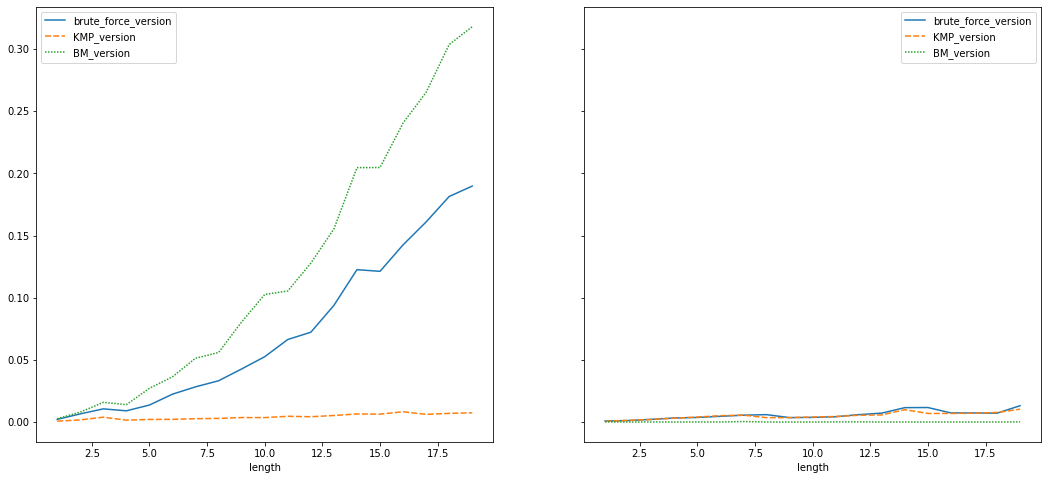

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(18,8))

dataset = pd.DataFrame(wfinal[1:],columns=wfinal[0])
dataset = dataset.set_index("length")
sns.lineplot(data=dataset,ax=ax1)
dataset = pd.DataFrame(bfinal[1:],columns=bfinal[0])
dataset = dataset.set_index("length")
sns.lineplot(data=dataset,ax=ax2)
ax1.set_title="Worst Case"
ax2.set_title="Best Case"
f.show()

# Worst case on the left, best case on the right

## Failed Algorithms

In [ ]:
#@title Inbuilt Python method to find multiple substrings

def python_regexiter_version(substring,original):
    import re
    list_of_idx = []
    for m in re.finditer(substring, original):
        list_of_idx.append(m.start())
    return list_of_idx

In [ ]:
#@title Rolling Hashing + KMP Adapted Search Method

def getRollingPairs(original):
  return [''.join(pair) for pair in zip(original[:-1], original[1:])]

def getPairTable(list_of_pairs):
    table = {}
    for i in range(len(list_of_pairs)):
        pair = list_of_pairs[i]
        if list_of_pairs[i] not in table:
            table[pair] = [i]
        else:
            table[pair].append(i)
    return table

def getSplitPairs(original,n=2):
  pairs = {i:original[i:i+n] for i in range(0, len(original), n)}
  if len(original) % 2 == 1:
      pairs[len(original)-n] = original[-2:]
      del pairs[len(original)-1]
  return pairs

def getKMPAdaptedTable(dict_of_pairs,n=2):
    pairs = [(v,k) for (k,v) in dict_of_pairs.items()]
    table = {0:0}
    for idx in range(len(pairs)-1):
        pair = pairs[idx][0]
        index = pairs[idx][1]
        next_index = pairs[idx+1][1]
        # print("Index:",index)
        # print("left:,",dict_of_pairs[table[index]],"Right:,",dict_of_pairs[next_index])
        
        if dict_of_pairs[table[index]] == dict_of_pairs[next_index]:
            table[next_index] = table[index] + n
            # print("Success: ",next_index,"==", table[index] + n)
        else:
            table[next_index] = 0
        # print()
    return table,[(v,k) for (k,v) in dict_of_pairs.items()]

def HASH_KMP_Adapted_version(substring,original):
    listPairs = getRollingPairs(original)
    PairTableFromText = getPairTable(listPairs)
    # Get lookup hash table from text

    p = getSplitPairs(substring)
    TableKMPFromSearchString, listSearchPairs = getKMPAdaptedTable(p)
    PairingDict = {}
    
    for i in [j for i,j in listSearchPairs][1:]:
        if len(PairingDict) == 0:
            previdx = i
            PairingDict[0] = i
            continue
        PairingDict[previdx] = i
        previdx = i
    PairingDict[i] = False
    # Get KMP skipping table from search string
    LocationOfPairings = {}
    # Removing all unneccessary pairings from the lookup table
    for hash,index in listSearchPairs:
        if hash not in PairTableFromText:
            # Best case O(1) pairing not in lookup table
            return []

        LocationOfPairings[index] = (PairTableFromText[hash])


    # Creating a recursive search function to keep searching pair after pair until whole string is matched
    def RecursiveSearch(IncrementIndex, OriginalIndex):
        IncrementIndex = PairingDict[IncrementIndex]
        while IncrementIndex: 
            i = LocationOfPairings[IncrementIndex][0]
            #print(i)
            # Delete all indexes that are below the current index (No element should be check twice)
            c = OriginalIndex+IncrementIndex
            while (i < c):
                del LocationOfPairings[IncrementIndex][0]
                if len(LocationOfPairings[IncrementIndex]) == 0:
                    return False, 0, True, 0 # (Fully matched?, Index to continue, Break Entire Loop as list of index is empty)
                i = LocationOfPairings[IncrementIndex][0]
            # If indexes are matched, continue to next pair
            if i == c:
                IncrementIndex = PairingDict[IncrementIndex]
                if (IncrementIndex) == False:
                    del LocationOfPairings[IncrementIndex][0]
                    break
            # Indexes are not matched, return the next index to continue matching if possible
            else:
                # Use KMP-style lookup table to skipped elements that are already checked
                return False, TableKMPFromSearchString[max(IncrementIndex-2,0)], False, i
        return True, TableKMPFromSearchString[IncrementIndex], False, i


    OriginalIndexes = LocationOfPairings[0]
    inc=0
    list_of_results = []
    minimum=0
    # Loop through the first pairing's list
    for idx in OriginalIndexes:
        # Search through all sequence O(n)
        Match, new_idx, breaks,minimum = RecursiveSearch(inc, idx)
        # If match, add to list
        if Match:
            list_of_results.append(idx)
        inc = new_idx
        # This has early-stopping for cases where lists are already empty as all list indexes are below current index, i.e. no possible future occurrence of pairing
        if breaks:
            break

    return list_of_results